In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import h5py
from activ import load_data
import pandas as pd
from activ.analytics import outcomes_histogram
from matplotlib.backends.backend_pdf import PdfPages

In [26]:
pdf = PdfPages('/Users/ahyeon/Desktop/activ misc/neuro_hist.pdf')

In [27]:
fulldata = pd.read_csv('/Users/ahyeon/Desktop/TBIanalysis/data/preprocessed_data_matrix.csv', encoding = "ISO-8859-1")
# fulldata = fulldata.fillna(-5)
fulldata.shape

(586, 919)

In [5]:
subdata = load_data()
nmfdata = load_data(uoinmf=True)
sub_oc_features = subdata.outcome_features
sub_bm_features = subdata.biomarker_features
oc_bases = nmfdata.outcome_bases
sub_oc = subdata.outcomes
sub_bm = subdata.biomarkers

In [28]:
def neuro_hist(sub, full6, full12, names):
    count=0
    for x, y, z, name in zip(sub6mo, full6mo, full12mo, names):
        sub = sub_oc[:,x]
        full6 = fulldata.iloc[:,y]
        full12 = fulldata.iloc[:,z]

        dat = full6
        dat2 = full12

        num_na = dat.isna().sum()
        num_na2 = dat2.isna().sum()
        nonresponsive = 29
        nonresponsive2 = 13

        dat_dropna = dat.dropna()
        dat2_dropna = dat2.dropna()
        counts, bins, bars = ax[count].hist([sub, dat_dropna, dat2_dropna], color=['red','grey', 'black'], label=['sub6mo', 'full6mo', 'full12mo'])
        length = (bins[1]-bins[0])/4

        ax[count].bar(2, nonresponsive, color='pink', label='nonresponsive', width=length)
        ax[count].bar(2, num_na-nonresponsive, color='grey', bottom = nonresponsive, width=length)
        ax[count].bar(2.1, nonresponsive2, color='pink', width=length)
        ax[count].bar(2.1, num_na2-nonresponsive2, color='black', bottom = nonresponsive2, width=length)
        ax[count].legend()
        ax[count].set_title(name)
        count += 1

In [6]:
# NeuroPhys
for ii,o in enumerate(sub_oc_features):
    if 'NeuroPhys' in o:
        print(o,ii)

NeuroPhysHeadache3mo 5
NeuroPhysBalanceProbl3mo 6
NeuroPhysDizziness3mo 7
NeuroPhysVisualProbl3mo 8
NeuroPhysFatigue3mo 9
NeuroPhysLightSensitivity3mo 10
NeuroPhysNoiseSensitivity3mo 11
NeuroPhysNumbnessTingling3mo 12
NeuroPhysHeadache6mo 33
NeuroPhysNausea6mo 34
NeuroPhysVomiting6mo 35
NeuroPhysBalanceProbl6mo 36
NeuroPhysDizziness6mo 37
NeuroPhysVisualProbl6mo 38
NeuroPhysFatigue6mo 39
NeuroPhysLightSensitivity6mo 40
NeuroPhysNoiseSensitivity6mo 41


In [7]:
for ii,o in enumerate(fulldata.columns):
    if 'NeuroPhys' in o:
        print(o,ii)

NeuroPhysHeadache3mo 354
NeuroPhysNausea3mo 355
NeuroPhysVomiting3mo 356
NeuroPhysBalanceProbl3mo 357
NeuroPhysDizziness3mo 358
NeuroPhysVisualProbl3mo 359
NeuroPhysFatigue3mo 360
NeuroPhysLightSensitivity3mo 361
NeuroPhysNoiseSensitivity3mo 362
NeuroPhysNumbnessTingling3mo 363
NeuroPhysHeadache6mo 408
NeuroPhysNausea6mo 409
NeuroPhysVomiting6mo 410
NeuroPhysBalanceProbl6mo 411
NeuroPhysDizziness6mo 412
NeuroPhysVisualProbl6mo 413
NeuroPhysFatigue6mo 414
NeuroPhysLightSensitivity6mo 415
NeuroPhysNoiseSensitivity6mo 416
NeuroPhysNumbnessTingling6mo 417
NeuroPhysHeadache_12mo 618
NeuroPhysNausea_12mo 619
NeuroPhysVomiting_12mo 620
NeuroPhysBalanceProbl_12mo 621
NeuroPhysDizziness_12mo 622
NeuroPhysVisualProbl_12mo 623
NeuroPhysFatigue_12mo 624
NeuroPhysLightSensitivity_12mo 625
NeuroPhysNoiseSensitivity_12mo 626
NeuroPhysNumbnessTingling_12mo 627


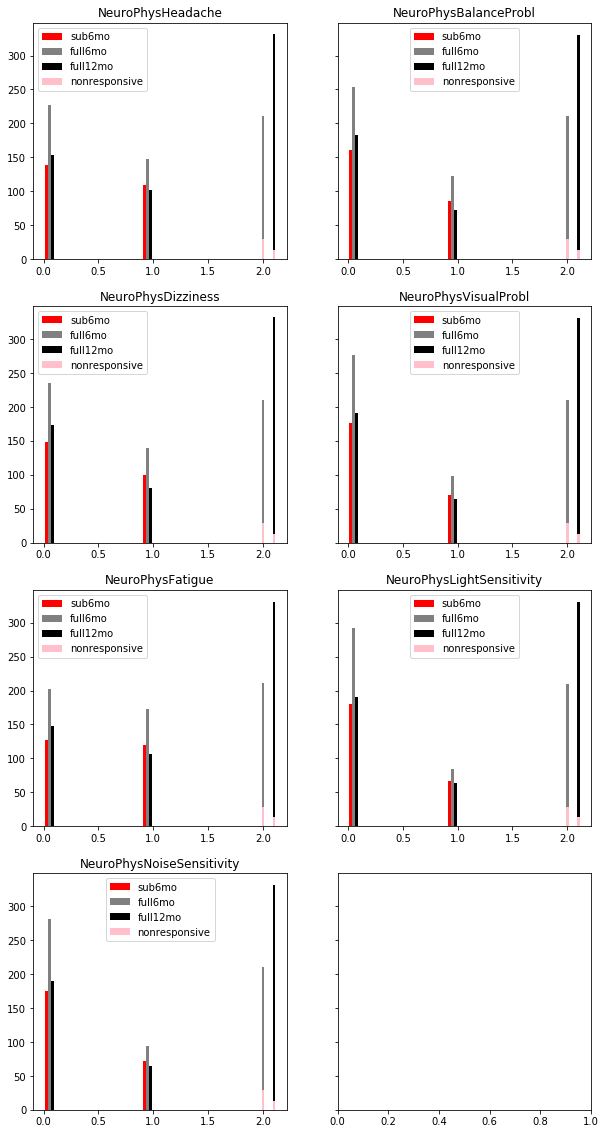

In [29]:
# Neurophys

sub6mo = [33,36,37,38,39,40,41]
full6mo = [408,411,412,413,414,415,416]
full12mo = [618,621,622,623,624,625,626]
fig, ax = plt.subplots(4,2,sharey=True,figsize=(10,20))
ax = ax.flatten()
count = 0
names = ['NeuroPhysHeadache','NeuroPhysBalanceProbl','NeuroPhysDizziness','NeuroPhysVisualProbl',
         'NeuroPhysFatigue','NeuroPhysLightSensitivity','NeuroPhysNoiseSensitivity']
    
for x, y, z, name in zip(sub6mo, full6mo, full12mo, names):
    sub = sub_oc[:,x]
    full6 = fulldata.iloc[:,y]
    full12 = fulldata.iloc[:,z]
    
    dat = full6
    dat2 = full12
    
    num_na = dat.isna().sum()
    num_na2 = dat2.isna().sum()
    nonresponsive = 29
    nonresponsive2 = 13

    dat_dropna = dat.dropna()
    dat2_dropna = dat2.dropna()
    counts, bins, bars = ax[count].hist([sub, dat_dropna, dat2_dropna], color=['red','grey', 'black'], label=['sub6mo', 'full6mo', 'full12mo'])
    length = (bins[1]-bins[0])/4
        
    ax[count].bar(2, nonresponsive, color='pink', label='nonresponsive', width=length)
    ax[count].bar(2, num_na-nonresponsive, color='grey', bottom = nonresponsive, width=length)
    ax[count].bar(2.1, nonresponsive2, color='pink', width=length)
    ax[count].bar(2.1, num_na2-nonresponsive2, color='black', bottom = nonresponsive2, width=length)
    ax[count].legend()
    ax[count].set_title(name)
    count += 1
    
pdf.savefig()

In [13]:
for ii,o in enumerate(sub_oc_features):
    if 'NeuroSleep' in o:
        print(o,ii)

NeuroSleepDrowsiness3mo 13
NeuroSleepSleepingLess3mo 14
NeuroSleepSleepingMore3mo 15
NeuroSleepTroubleFallingAsleep3mo 16
NeuroSleepDrowsiness6mo 42
NeuroSleepSleepingLess6mo 43
NeuroSleepSleepingMore6mo 44
NeuroSleepTroubleFallingAsleep6mo 45


In [14]:
for ii,o in enumerate(fulldata.columns):
    if 'NeuroSleep' in o:
        print(o,ii)

NeuroSleepDrowsiness3mo 364
NeuroSleepSleepingLess3mo 365
NeuroSleepSleepingMore3mo 366
NeuroSleepTroubleFallingAsleep3mo 367
NeuroSleepDrowsiness6mo 418
NeuroSleepSleepingLess6mo 419
NeuroSleepSleepingMore6mo 420
NeuroSleepTroubleFallingAsleep6mo 421
NeuroSleepDrowsiness_12mo 628
NeuroSleepSleepingLess_12mo 629
NeuroSleepSleepingMore_12mo 630
NeuroSleepTroubleFallingAsleep_12mo 631


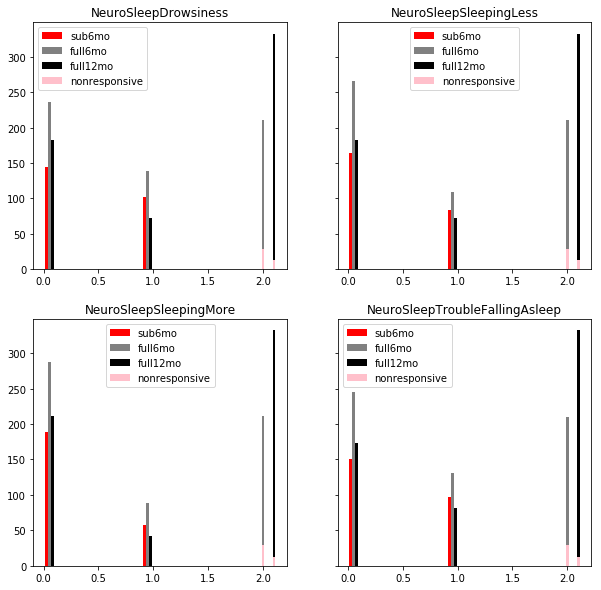

In [30]:
# NeuroSleep
fig, ax = plt.subplots(2,2,sharey=True,figsize=(10,10))
ax = ax.flatten()
count = 0

sub6mo = [42,43,44,45]
full6mo = [418,419,420,421]
full12mo = [628,629,630,631]
names = ['NeuroSleepDrowsiness','NeuroSleepSleepingLess','NeuroSleepSleepingMore','NeuroSleepTroubleFallingAsleep']
    
for x, y, z, name in zip(sub6mo, full6mo, full12mo, names):
    sub = sub_oc[:,x]
    full6 = fulldata.iloc[:,y]
    full12 = fulldata.iloc[:,z]
    
    dat = full6
    dat2 = full12
    
    num_na = dat.isna().sum()
    num_na2 = dat2.isna().sum()
    nonresponsive = 29
    nonresponsive2 = 13

    dat_dropna = dat.dropna()
    dat2_dropna = dat2.dropna()
    counts, bins, bars = ax[count].hist([sub, dat_dropna, dat2_dropna], color=['red','grey', 'black'], label=['sub6mo', 'full6mo', 'full12mo'])
    length = (bins[1]-bins[0])/4
        
    ax[count].bar(2, nonresponsive, color='pink', label='nonresponsive', width=length)
    ax[count].bar(2, num_na-nonresponsive, color='grey', bottom = nonresponsive, width=length)
    ax[count].bar(2.1, nonresponsive2, color='pink', width=length)
    ax[count].bar(2.1, num_na2-nonresponsive2, color='black', bottom = nonresponsive2, width=length)
    ax[count].legend()
    ax[count].set_title(name)
    count += 1
    
pdf.savefig()

In [33]:
for ii,o in enumerate(sub_oc_features):
    if 'NeuroCog' in o:
        print(o,ii)

NeuroCognitiveFoggy3mo 17
NeuroCognitiveSlowedDown3mo 18
NeuroCognitiveDiffConcentrating3mo 19
NeuroCognitiveDiffRemembering3mo 20
NeuroCognitiveFoggy6mo 46
NeuroCognitiveSlowedDown6mo 47
NeuroCognitiveDiffConcentrating6mo 48
NeuroCognitiveDiffRemembering6mo 49


In [34]:
for ii,o in enumerate(fulldata.columns):
    if 'NeuroCog' in o:
        print(o,ii)

NeuroCognitiveFoggy3mo 368
NeuroCognitiveSlowedDown3mo 369
NeuroCognitiveDiffConcentrating3mo 370
NeuroCognitiveDiffRemembering3mo 371
NeuroCognitiveFoggy6mo 422
NeuroCognitiveSlowedDown6mo 423
NeuroCognitiveDiffConcentrating6mo 424
NeuroCognitiveDiffRemembering6mo 425
NeuroCognitiveFoggy_12mo 632
NeuroCognitiveSlowedDown_12mo 633
NeuroCognitiveDiffConcentrating_12mo 634
NeuroCognitiveDiffRemembering_12mo 635


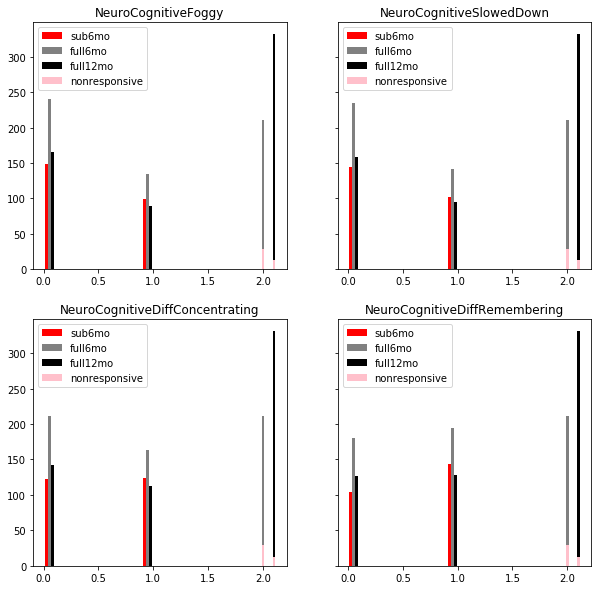

In [31]:
# NeuroCognitive
sub6mo = [46,47,48,49]
full6mo = [422,423,424,425]
full12mo = [632,633,634,635]
names = ['NeuroCognitiveFoggy','NeuroCognitiveSlowedDown','NeuroCognitiveDiffConcentrating','NeuroCognitiveDiffRemembering']
fig, ax = plt.subplots(2,2,sharey=True,figsize=(10,10))
ax = ax.flatten()

neuro_hist(sub6mo, full6mo, full12mo, names)
pdf.savefig()

In [36]:
for ii,o in enumerate(sub_oc_features):
    if 'NeuroEmot' in o:
        print(o,ii)

NeuroEmotionalMoreEmotional3mo 21
NeuroEmotionalNervousness3mo 22
NeuroEmotionalIrritability6mo 50
NeuroEmotionalSadness6mo 51
NeuroEmotionalMoreEmotional6mo 52
NeuroEmotionalNervousness6mo 53


In [37]:
for ii,o in enumerate(fulldata.columns):
    if 'NeuroEmot' in o:
        print(o,ii)

NeuroEmotionalIrritability3mo 372
NeuroEmotionalSadness3mo 373
NeuroEmotionalMoreEmotional3mo 374
NeuroEmotionalNervousness3mo 375
NeuroEmotionalIrritability6mo 426
NeuroEmotionalSadness6mo 427
NeuroEmotionalMoreEmotional6mo 428
NeuroEmotionalNervousness6mo 429
NeuroEmotionalIrritability_12mo 636
NeuroEmotionalSadness_12mo 637
NeuroEmotionalMoreEmotional_12mo 638
NeuroEmotionalNervousness_12mo 639


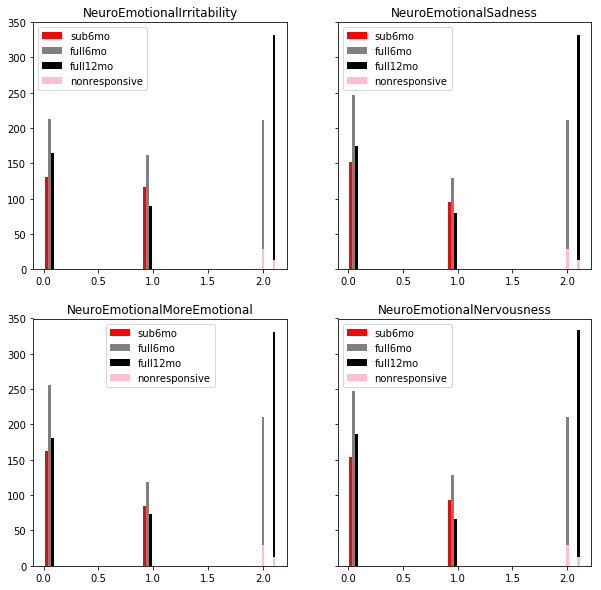

In [33]:
#NeuroEmotional
sub6mo = [50,51,52,53]
full6mo = [426,427,428,429]
full12mo = [636,637,638,639]
names = ['NeuroEmotionalIrritability','NeuroEmotionalSadness','NeuroEmotionalMoreEmotional','NeuroEmotionalNervousness']
count=0
fig, ax = plt.subplots(2,2,sharey=True,figsize=(10,10))
ax = ax.flatten()

neuro_hist(sub6mo, full6mo, full12mo, names)
pdf.savefig()
pdf.close()

In [7]:
for ii,o in enumerate(sub_oc_features):
    if 'NeuroOverall' in o:
        print(o,ii)

NeuroOverallRating3mo 23
NeuroOverallRating6mo 56


In [8]:
for ii,o in enumerate(fulldata.columns):
    if 'NeuroOverall' in o:
        print(o,ii)

NeuroOverallRating3mo 378
NeuroOverallRating6mo 432
NeuroOverallRating_12mo 642


211 331
6.6000000000000005 7.199999999999999


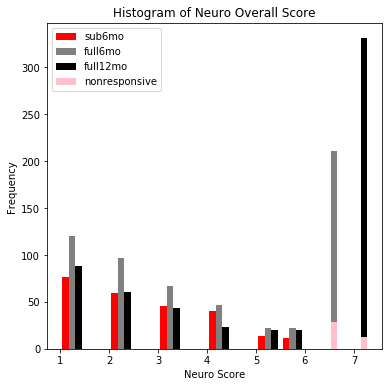

In [13]:
#NeuroOverall
sub6mo = sub_oc[:,56]
full6mo = fulldata.iloc[:,432]
full12mo = fulldata.iloc[:,642]
plt.figure(figsize=(6,6))

dat = full6mo
dat2 = full12mo

num_na = dat.isna().sum()
num_na2 = dat2.isna().sum()
print(num_na, num_na2)
nonresponsive = 29
nonresponsive2 = 13

dat_dropna = dat.dropna()
dat2_dropna = dat2.dropna()
counts, bins, bars = plt.hist([sub6mo, dat_dropna, dat2_dropna], color=['red','grey', 'black'], 
                              label=['sub6mo', 'full6mo', 'full12mo'])
length = (bins[1]-bins[0])/4

mx = max(max(dat_dropna),max(dat2_dropna))

na_index = mx*(1+1/10) 
na_index2 = mx*(1+2/10)
print(na_index, na_index2)
plt.bar(na_index, nonresponsive, color='pink', label='nonresponsive', width=length)
plt.bar(na_index, num_na-nonresponsive, color='grey', bottom = nonresponsive, width=length)
plt.bar(na_index2, nonresponsive2, color='pink', width=length)
plt.bar(na_index2, num_na2-nonresponsive2, color='black', bottom = nonresponsive2, width=length)

plt.title('Histogram of Neuro Overall Score')
plt.xlabel('Neuro Score')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('/Users/ahyeon/Desktop/activ misc/neuro_summary_hist.pdf')

In [70]:
pdf.close()